# 第11章　季節性とマクロ変数を加える?
## 11.3 季節性の具体例

In [128]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as web
import numpy as np
end='2016/9/30'
n225 = web.DataReader("NIKKEI225", 'fred',"1949/5/16",end).dropna()
develop=n225.loc[:'1989/12/31']
reform=n225.loc['1989/12/31':]
year=n225.loc['1989']
years=[x+1950 for x in range(66)]
m=lambda x:x.month
count=[0]*12
alpha=0.1
for i in range(len(years)):
    year=n225.loc[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])>t0:# and years[i]>=1990:
            count[j]+=1
print(count)

[24, 15, 14, 9, 14, 10, 9, 14, 16, 9, 14, 15]


In [129]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
alpha=0.1
for i in range(len(years)):
    year=n225.loc[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])>t0 and years[i]>=1990:
            count[j]+=1
print(count)
print(t0)

[2, 3, 2, 2, 4, 2, 2, 1, 5, 1, 3, 4]
1.3634303180205214


In [130]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
for i in range(len(years)):
    year=n225.loc[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])>t0:# and years[i]>=1990:
            count[j]+=1
print(count)

[24, 15, 14, 9, 14, 10, 9, 14, 16, 9, 14, 15]


In [131]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
for i in range(len(years)):
    year=n225.loc[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])<t0:# and years[i]>=1990:
            count[j]+=1
print(count)

[2, 5, 5, 2, 9, 4, 6, 6, 5, 4, 7, 3]


In [132]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
for i in range(len(years)):
    year=n225.loc[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])<t0 and years[i]>=1990:
            count[j]+=1
print(count)

[1, 2, 2, 0, 4, 2, 2, 2, 3, 0, 3, 1]


In [133]:
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.loc[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])>t0:
            count[j]+=1
print(count)

[15, 17, 14, 13, 10]


In [134]:
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.loc[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])>t0 and years[j]>1990:
            count[j]+=1
print(count)

[0, 0, 0, 0, 0]


In [135]:
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.loc[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])<t0:
            count[j]+=1
print(count)

[7, 10, 5, 3, 7]


In [136]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.loc[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])<t0 and years[j]>1990:
            count[j]+=1
print(count)

[0, 0, 0, 0, 0]


## 11.4 マクロ変数との関係(単回帰と多変量解析)

In [168]:
import pandas_datareader.data as pdr
import numpy as np
start='1971/12/1'
end='2016/8/31'
workpop = web.DataReader('LFWA64TTJPM647S',"fred",start,end).dropna()
gdp = web.DataReader('MKTGDPJPA646NWDB',"fred",start,end).dropna()
gdp=gdp.resample('A',loffset='-1d').last().dropna()
fx = web.DataReader('DEXJPUS',"fred",start,end).dropna()
fx=fx.resample('A',loffset='-1d').last().dropna()
workpop=workpop.loc['1972':].resample('A',loffset='-1d').last().dropna()
gdpjpy=gdp.MKTGDPJPA646NWDB*fx.DEXJPUS
gdpjpy=np.log(gdpjpy).dropna()
workpop=np.log(workpop).dropna()
len(workpop)

45

In [173]:
import statsmodels.api as sm
x=sm.add_constant(workpop.values)
x=pd.DataFrame(x,index=gdpjpy.index.date,columns=['const','workpop'])
model=sm.OLS(gdpjpy,x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     48.32
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.52e-08
Time:                        16:55:00   Log-Likelihood:                -12.928
No. Observations:                  45   AIC:                             29.86
Df Residuals:                      43   BIC:                             33.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -90.6491     17.866     -5.074      0.0

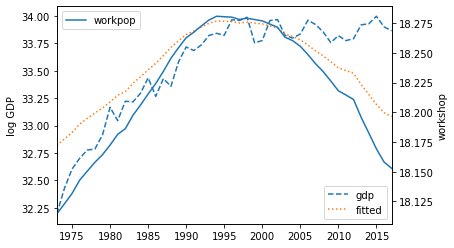

In [174]:
%matplotlib inline 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore') 
#ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. 
#forecasting.' ignored when e.g. forecasting.', ValueWarning)

f,ax = plt.subplots()#２軸のグラフの準備
ax.plot(gdpjpy,label='gdp',linestyle="--")
ax2=ax.twinx()#２軸目をax2として設定
ax2.plot((workpop),label='workpop')#２軸目にプロット
results.fittedvalues.plot(label='fitted',style=':',ax=ax)
ax.set_ylabel('log GDP')#1軸目にラベルを設定
ax2.set_ylabel('workshop')#2軸目にラベルを設定
ax.legend(loc='lower right')
ax2.legend(loc='upper left')

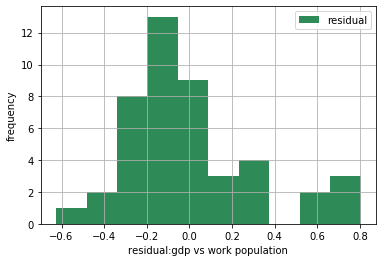

In [175]:
import matplotlib.pyplot as plt
results.resid.hist(label='residual',color='seagreen')
plt.xlabel('residual:gdp vs work population')
plt.ylabel('frequency')
plt.legend(loc='upper right')

In [176]:
import pandas as pd
lnn225 = np.log(pdr.DataReader("NIKKEI225", 'fred',start,end).dropna())
lnn225=lnn225.resample('A',loffset='-1d').last().dropna()
lnn225=lnn225.iloc[1:]
port=np.column_stack((x,gdpjpy))
#print(port)
port=pd.DataFrame(port,index=lnn225.index,columns=['const','workpop','gdpjpy'])
model=sm.OLS(lnn225,port)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              NIKKEI225   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     32.81
Date:                Sun, 10 May 2020   Prob (F-statistic):           2.62e-09
Time:                        16:55:31   Log-Likelihood:                -15.464
No. Observations:                  45   AIC:                             36.93
Df Residuals:                      42   BIC:                             42.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -80.0603     24.182     -3.311      0.0

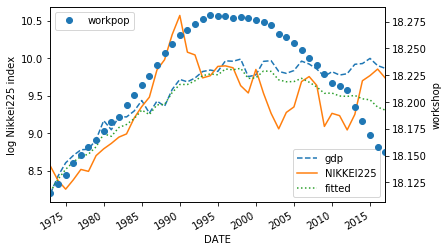

In [177]:
#多変量解析：折れ線グラフ
f,ax = plt.subplots()#２軸のグラフの準備
(port.gdpjpy-24).plot(label='gdp',linestyle="--",ax=ax)
lnn225.plot(label='n225',ax=ax)
ax2=ax.twinx()#２軸目をax2として設定
(port.workpop).plot(label='workpop',ax=ax2,style='o')
results.fittedvalues.plot(label='fitted',style=':',ax=ax)
plt.legend(loc='upper left')
ax.set_ylabel('log Nikkei225 index')#1軸目にラベルを設定
ax2.set_ylabel('workshop')#2軸目にラベルを設定
ax.legend(loc='lower right')
ax2.legend(loc='upper left')

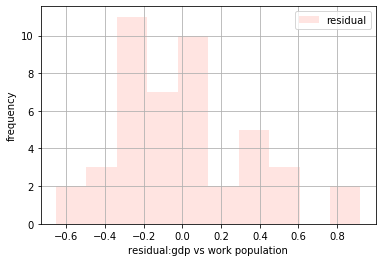

In [178]:
#多変量解析：ヒストグラム
results.resid.hist(label='residual',color='mistyrose')
plt.xlabel('residual:gdp vs work population')
plt.ylabel('frequency')
plt.legend(loc='upper right')

In [179]:
#バブル崩壊前
port_b=port.loc[:'1990/1/1']
model_b=sm.OLS(lnn225.loc[:'1990/1/1'],port_b)
results_b=model_b.fit()
print(results_b.summary())

                            OLS Regression Results                            
Dep. Variable:              NIKKEI225   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sun, 10 May 2020   Prob (F-statistic):           6.87e-10
Time:                        16:56:54   Log-Likelihood:                 6.7380
No. Observations:                  18   AIC:                            -7.476
Df Residuals:                      15   BIC:                            -4.805
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -381.2246     49.116     -7.762      0.0

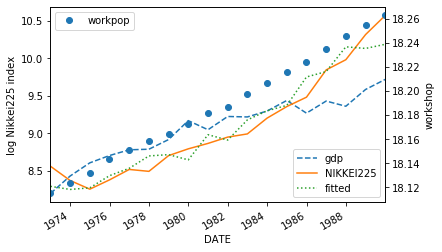

In [180]:
#バブル崩壊前のグラフ
f,ax = plt.subplots()#２軸のグラフの準備
(port.loc[:'1990/1/1'].gdpjpy-24).plot(label='gdp',linestyle="--",ax=ax)
lnn225.loc[:'1990/1/1'].plot(label='n225',ax=ax)
ax2=ax.twinx()#２軸目をax2として設定
(port[:'1990/1/1'].workpop).plot(label='workpop',style='o',ax=ax2)
#書籍のグラフはworkpopから8.5引いてしまっているので、こちらが正しいグラフです。
results_b.fittedvalues.plot(label='fitted',style=':',ax=ax)
ax.set_ylabel('log Nikkei225 index')#1軸目にラベルを設定
ax2.set_ylabel('workshop')#2軸目にラベルを設定
ax.legend(loc='lower right')
ax2.legend(loc='upper left')

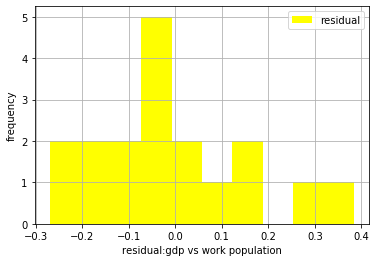

In [181]:
#バブル崩壊前：ヒストグラム
results_b.resid.hist(label='residual',color='yellow')
plt.xlabel('residual:gdp vs work population')
plt.ylabel('frequency')
plt.legend(loc='upper right')

In [182]:
#バブル崩壊後
port_a=port.loc['1990/1/1':]
results_a=(sm.OLS(lnn225.loc['1990/1/1':],port_a)).fit()
print(results_a.summary())

                            OLS Regression Results                            
Dep. Variable:              NIKKEI225   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.5120
Date:                Sun, 10 May 2020   Prob (F-statistic):              0.606
Time:                        16:57:13   Log-Likelihood:                -5.3742
No. Observations:                  27   AIC:                             16.75
Df Residuals:                      24   BIC:                             20.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.9336     39.528     -0.757      0.4

In [187]:
import pandas as pd
lnn225 = np.log(pdr.DataReader("NIKKEI225", 'fred',start,end).dropna())
lnn225=lnn225.resample('A',loffset='-1d').last().dropna()
lnfx=np.log(fx)
port1=np.column_stack((lnn225.iloc[1:].values,x,gdpjpy.values,lnfx.iloc[1:].values))
port1=pd.DataFrame(port1,index=lnn225.index[1:],columns=["n225","const","workpop","gdpjpy","fx"])
model1=sm.OLS(port1.n225,port1.iloc[0:,1:])
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     21.47
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.62e-08
Time:                        17:01:22   Log-Likelihood:                -15.391
No. Observations:                  45   AIC:                             38.78
Df Residuals:                      41   BIC:                             46.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -82.6597     25.454     -3.247      0.0

In [190]:
#バブル崩壊後：要素にドル円の為替レートを追加
port1_a=port1.loc['1990/1/1':]

results1_a=(sm.OLS(port1_a.n225,port1_a.iloc[0:,1:])).fit()
print(results1_a.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     3.438
Date:                Sun, 10 May 2020   Prob (F-statistic):             0.0336
Time:                        17:02:31   Log-Likelihood:               -0.93713
No. Observations:                  27   AIC:                             9.874
Df Residuals:                      23   BIC:                             15.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9699     37.676      0.450      0.6

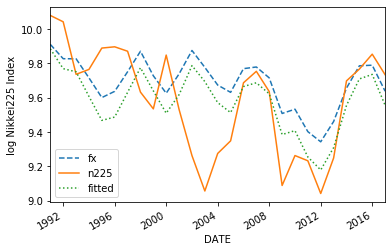

In [191]:
##バブル崩壊後のグラフ：ドル円の為替レート
(port1['1990/1/1':].fx+5).plot(label='fx',linestyle="--")
port1['1990/1/1':].n225.plot(label='n225')
results1_a.fittedvalues.plot(label='fitted',style=':')
plt.ylabel('log Nikkei225 Index')
plt.legend(loc='lower left')

In [192]:
#バブル崩壊後：細分化
def report(port):
    results1_a=(sm.OLS(port1_a.n225,port1_a.iloc[0:,1:]))\
    .fit()
    print("R-squared: ",results1_a.rsquared," F-pvalue: ",results1_a.f_pvalue," AIC: "\
          ,results1_a.aic," BIC: ",results1_a.bic)
    print("pvalues: ")
    print(results1_a.pvalues)
    from statsmodels.compat import lzip
    import statsmodels.stats.api as sms
    test=sms.jarque_bera(results1_a.resid)
    print("jbpv: ",test[1])
port1_a=port1['1990/1/1':'2000/1/1']
report(port1_a)

R-squared:  0.65577854910928  F-pvalue:  0.07676982580815307  AIC:  -10.937911231949158  BIC:  -9.727570859972975
pvalues: 
const      0.019459
workpop    0.021500
gdpjpy     0.207605
fx         0.080026
dtype: float64
jbpv:  0.7430654198056974


In [193]:
#バブル崩壊後：細分化2
port1_a=port1.loc['2000/1/1':'2008/1/1']
report(port1_a)

R-squared:  0.9261560453862148  F-pvalue:  0.00996898531011142  AIC:  -13.725884322743617  BIC:  -13.408118156024274
pvalues: 
const      0.061178
workpop    0.007690
gdpjpy     0.006358
fx         0.057891
dtype: float64
jbpv:  0.7310059094392904


In [ ]:
#バブル崩壊後：細分化3
port1_a=port1.loc['2008/1/1':]
report(port1_a)